In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df_full = pd.read_csv('moore.txt', sep=';')
df_full.head()

,Year,Transistors,Clock (MHz),Power Density (W/cm²),Cores
0,1971,2300,0.74,3.750000,1
1,1974,4500,2.00,3.900000,1
2,1976,6500,3.00,4.450000,1
3,1978,29000,5.00,5.666667,1
4,1979,29000,5.00,5.151515,1


In [5]:
df = df_full[['Year', 'Transistors']]
df.head()

,Year,Transistors
0,1971,2300
1,1974,4500
2,1976,6500
3,1978,29000
4,1979,29000


In [6]:
X = np.array(df['Year'])
Y = np.array(df['Transistors'])

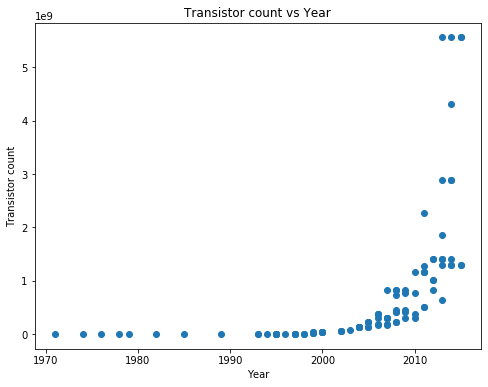

In [7]:
# Plot data
plt.figure(figsize=(8, 6))
plt.title('Transistor count vs Year')
plt.xlabel('Year')
plt.ylabel('Transistor count')
plt.scatter(X, Y)
plt.show()

In [8]:
Y = np.log(Y)

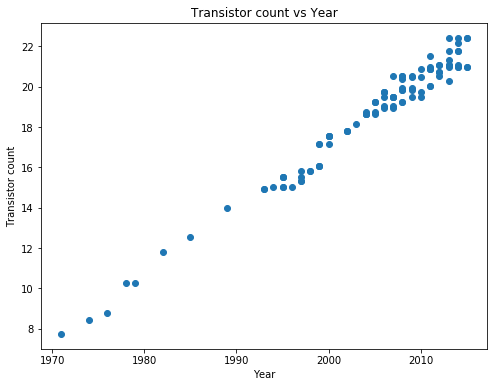

In [9]:
# Plot data
plt.figure(figsize=(8, 6))
plt.title('Transistor count vs Year')
plt.xlabel('Year')
plt.ylabel('Transistor count')
plt.scatter(X, Y)
plt.show()

In [10]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [11]:
Yhat = a*X + b

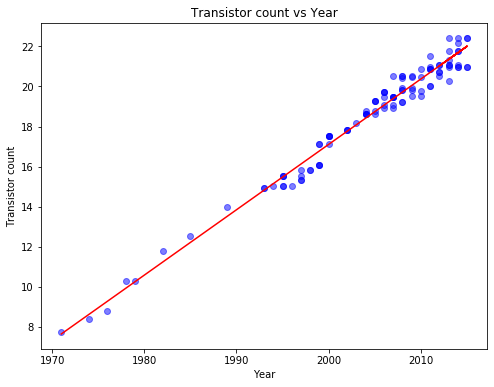

In [14]:
# Plot data
plt.figure(figsize=(8, 6))
plt.title('Transistor count vs Year')
plt.xlabel('Year')
plt.ylabel('Transistor count')
plt.scatter(X, Y, alpha=0.5, color='blue')
plt.plot(X, Yhat, color='red')
plt.show()

In [18]:
# Calculate R-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print('a (Slope): ', a, '\nb (y-intercept): ', b)
print('The r-squared is: ', r2)

a (Slope):  0.3264308125113452 
b (y-intercept):  -635.7505402613792
The r-squared is:  0.9747388483248179


In [19]:
# log(tc) = a*year + b
# tc = exp(a*year) * exp(b)
# 2*tc = 2 * exp(a*year) * exp(b) = exp(ln(2)) * exp(a*year) * exp(b)
#      = exp(a*year + ln(2)) * exp(b)
# exp(b) * exp(a*year2) = exp(b) * exp(a*year1 + ln(2))
# a*year2 = a*year1 + ln(2)
# year2 = year1 + ln(2)/a

print('Time to double: ', np.log(2)/a, 'years')

Time to double:  2.1234122331385454 years
